In [1]:
# run in forrestwilliams/gis:1.03
%matplotlib inline
import matplotlib.pyplot as plt
import rasterio as rio
import geopandas as gpd
import numpy as np
from scipy import ndimage

In [2]:
def read_raster(path,bands=1,crs=False):
    with rio.open(path) as dst:
        array = dst.read(bands)
        profile = dst.profile
        crs_val = dst.crs
        # array = np.moveaxis(array,0,-1)
    
    result = [array, profile]

    if crs:
        result.append(crs_val)

    return result


def write_raster(array,profile,out_path,dtype=rio.uint8):
    # From rasterio docs:
    # Register GDAL format drivers and configuration options with a
    # context manager.
    with rio.Env():
        # And then change the band count to 1, set the
        # dtype to uint8, and specify LZW compression.
        profile.update(
            dtype=dtype,
            count=1,
            compress='lzw')

        with rio.open(out_path, 'w', **profile) as dst:
            dst.write(array.astype(dtype), 1)

    return out_path

In [3]:
cd /home/micromamba/data

/home/micromamba/data


In [70]:
def plot_dod(a,vmin=-20,vmax=20):
    # a = a[:,~np.isnan(a).all(axis=0)]
    # a = a[~np.isnan(a).all(axis=1),:]
    
    f, ax = plt.subplots(1,1,figsize=(8,8))
    cax = ax.imshow(a,cmap='seismic',vmin=vmin,vmax=vmax,interpolation=None)

    f.colorbar(cax,fraction=0.05)
    plt.tight_layout()
    return None

In [5]:
arr, profile = read_raster('DoD/DoD/raw.tif')
arr[arr==-32767] = np.nan
vals = arr[~np.isnan(arr)].flatten()

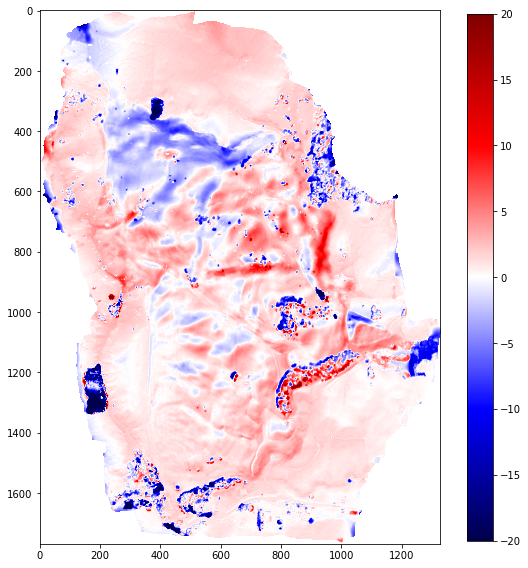

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plot_dod(arr)

(-10.0, 10.0)

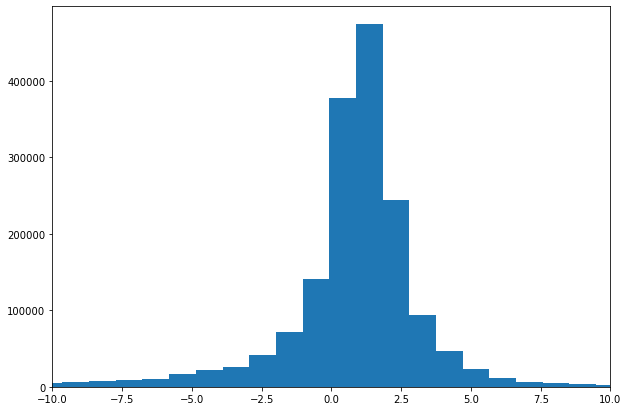

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,1,figsize=(10,7))
h = ax.hist(vals,bins=100)
ax.set_xlim(-10,10)

In [8]:
m, std = np.nanmedian(arr), np.nanstd(arr)

In [9]:
no_high_median = np.median(arr[np.abs(arr-m) < 3*std])

In [10]:
no_high_median

1.0516968

In [11]:
shift = arr - no_high_median

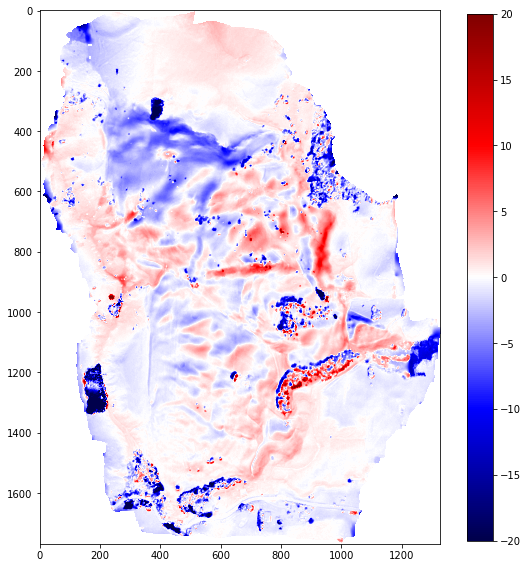

In [21]:
plot_dod(shift)

In [32]:
x, y = 100,100
kernel = (np.ones((x,y)) / (x*y))

In [33]:
blurred = ndimage.convolve(shift,kernel)

In [31]:
blurred50 = blurred.copy()

In [34]:
blurred100 = blurred.copy()

In [36]:
local_dev = shift - blurred

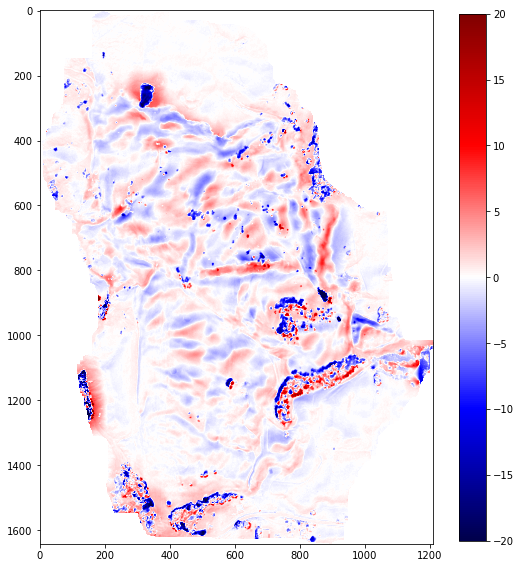

In [50]:
plot_dod(local_dev)

In [41]:
dev_std = np.nanstd(local_dev)

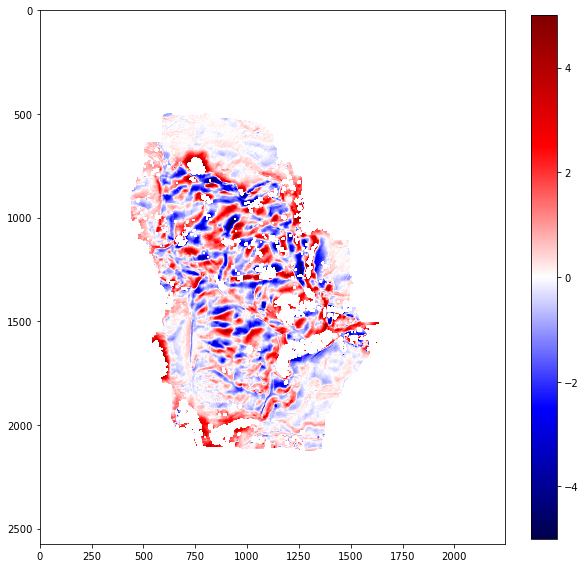

In [92]:
tmp = local_dev.copy()
tmp[np.abs(local_dev) > dev_std*2] = np.nan
plot_dod(tmp,vmin=-5,vmax=5)

In [95]:
no_outlier = shift.copy()
no_outlier[np.abs(local_dev) > dev_std*2] = np.nan

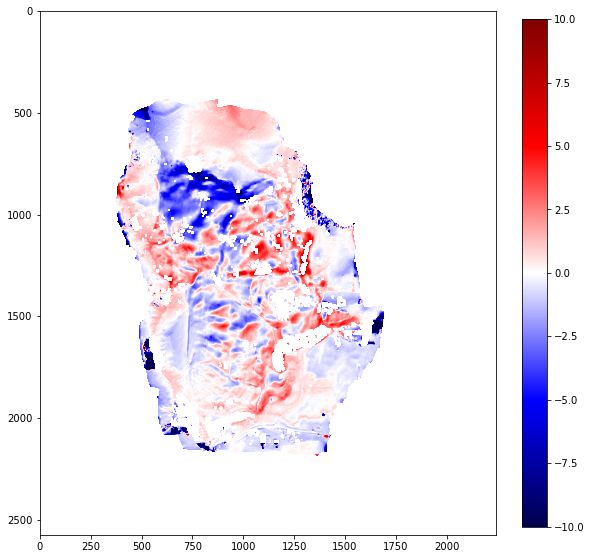

In [96]:
plot_dod(no_outlier,vmin=-10,vmax=10)

In [97]:
write_raster(no_outlier,profile,'DoD/DoD/filt_fw_std2.tif',dtype=rio.float32)

'DoD/DoD/filt_fw_std2.tif'

# ignore

In [15]:
m, std = np.nanmedian(shift), np.nanstd(shift)

In [29]:
high = shift.copy()
high[np.abs(arr) > 4*std] = np.nan

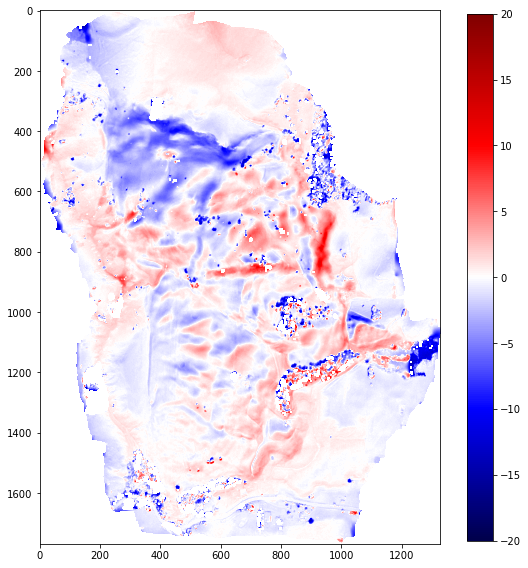

In [30]:
plot_dod(high)